Binary 4/6 A)

mRNA localization using binary classification (endoplasmic reticulum/mitochondria) (part 1/2): basic model with: <br> 
<br>
a) Method 1: no feature selection and <br>
b) Method 2: with feature importance-based feature selection (get_feature_importance type (default) =  EFstrType.FeatureImportance, i.e. PredictionValuesChange) <br>
c) Method 3: with feature importance-based feature selection (feature importance type: SHAP values)

In [14]:
import pandas as pd
from catboost import CatBoostClassifier
from catboost import Pool
import matplotlib.pyplot as plt
import numpy as np
import shap

In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score, roc_auc_score, precision_recall_curve, roc_curve, auc, f1_score, classification_report


In [16]:
#data initialization


#Endoplasmic reticulum (label = 1)
ER_train = pd.read_csv("../../Data/InputData/ER_iLearnfeatvalues_train_CSV.csv")
ER_test = pd.read_csv("../../Data/InputData/ER_iLearnfeatvalues_test_CSV.csv")

#Mitochondria (label = 2)
MT_train = pd.read_csv("../../Data/InputData/MT_iLearnfeatvalues_train_CSV.csv")
MT_test = pd.read_csv("../../Data/InputData/MT_iLearnfeatvalues_test_CSV.csv")

print("ER TRAIN, TEST SHAPE:", ER_train.shape, ",", ER_test.shape)
print("MT TRAIN, TEST SHAPE:", MT_train.shape, ",", MT_test.shape)


ER TRAIN, TEST SHAPE: (296, 1026) , (74, 1026)
MT TRAIN, TEST SHAPE: (280, 1026) , (70, 1026)


In [17]:
###### NEXT STEP #######
#Merge training files for binary classification (CP+ER, CP+MT, CP+NU, ER+MT, ER+NU, MT+NU)
#Merge testing files same way

#How to merge: 
# - https://saturncloud.io/blog/how-to-merge-two-csv-files-into-one-with-pandas-by-id/
# or pd.concat


In [18]:

#Group 4: ER + MT

frames_EM_tra = [ER_train, MT_train]
frames_EM_tes = [ER_test, MT_test]

ER_MT_train = pd.concat(frames_EM_tra)
ER_MT_test = pd.concat(frames_EM_tes)



In [19]:


print("\nER + MT TRAIN, TEST SHAPE:", ER_MT_train.shape, ",", ER_MT_test.shape)



ER + MT TRAIN, TEST SHAPE: (576, 1026) , (144, 1026)


In [20]:
ER_MT_test.head(77)

,#,label,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,mRNALoc_9547#3911|1|testing,1,0.001311,0.000087,0.000262,0.000262,0.000000,0.000437,0.000175,0.000175,...,0.000087,0.000262,0.000175,0.000262,0.001224,0.000612,0.000175,0.000087,0.000175,0.000175
1,mRNALoc_11948#55102|1|testing,1,0.002614,0.000991,0.001893,0.003245,0.001532,0.000811,0.000541,0.001532,...,0.000180,0.002614,0.001442,0.001712,0.002073,0.001532,0.003335,0.002704,0.002524,0.003064
2,mRNALoc_18167#84629|1|testing,1,0.002457,0.000472,0.000567,0.000284,0.000189,0.000756,0.000095,0.000661,...,0.000378,0.000189,0.000284,0.000378,0.000472,0.000756,0.000567,0.000378,0.000378,0.001417
3,mRNALoc_4038#1952|1|testing,1,0.001044,0.000000,0.000854,0.000285,0.000095,0.000380,0.000190,0.000190,...,0.000285,0.000664,0.000759,0.001139,0.000759,0.000664,0.000475,0.000949,0.000569,0.001044
4,mRNALoc_19976#9881|1|testing,1,0.002954,0.001143,0.002192,0.001620,0.001239,0.001239,0.000572,0.000572,...,0.000191,0.001715,0.002668,0.000858,0.001429,0.000667,0.000667,0.001620,0.001810,0.002573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,mRNALoc_17982#84230|1|testing,1,0.004165,0.002777,0.002360,0.005137,0.002915,0.000972,0.000000,0.002221,...,0.000416,0.003193,0.002777,0.001666,0.001666,0.003054,0.004998,0.003193,0.003610,0.006247
73,mRNALoc_19858#9728|1|testing,1,0.009463,0.002922,0.003896,0.002922,0.002087,0.000974,0.000278,0.002922,...,0.000139,0.002644,0.002505,0.002505,0.001252,0.002087,0.003062,0.001392,0.003201,0.002783
0,mRNALoc_18808#856050|2|testing,2,0.001747,0.001747,0.005240,0.005240,0.001747,0.000873,0.002620,0.001747,...,0.000873,0.001747,0.001747,0.001747,0.001747,0.001747,0.001747,0.000873,0.001747,0.003493
1,mRNALoc_18516#852314|2|testing,2,0.010536,0.004390,0.004390,0.006146,0.003512,0.001756,0.000878,0.001756,...,0.000000,0.002634,0.003512,0.000878,0.003512,0.000878,0.001756,0.002634,0.004390,0.000000


In [21]:
#FOR ER+MT
noname_EM_train = ER_MT_train.drop("#", axis="columns")
noname_EM_test = ER_MT_test.drop("#", axis="columns")


ER_MT_X_train = noname_EM_train.drop("label", axis="columns")
ER_MT_y_train = noname_EM_train["label"]

ER_MT_X_test = noname_EM_test.drop("label", axis="columns")
ER_MT_y_test = noname_EM_test["label"]

print("ER + MT X train:", ER_MT_X_train.shape)
print("ER + MT y train:", ER_MT_y_train.shape)
print("ER + MT X test:", ER_MT_X_test.shape)
print("ER + MT y test:", ER_MT_y_test.shape)

ER + MT X train: (576, 1024)
ER + MT y train: (576,)
ER + MT X test: (144, 1024)
ER + MT y test: (144,)


In [22]:
# Create data pools for feature importance/selection for ER + MT

EM_feature_names = list(ER_MT_X_train.columns)
print("Number of features:", len(EM_feature_names))

EM_train_pool = Pool(ER_MT_X_train, ER_MT_y_train, feature_names=EM_feature_names)

EM_test_pool = Pool(ER_MT_X_test, ER_MT_y_test)

print("*ER, Mitochondria Pools created")

Number of features: 1024
*ER, Mitochondria Pools created


    Method 1: Initial classification (without feature importance, selection or auto_class_weights)

In [23]:
EM_binary_model = CatBoostClassifier(loss_function="MultiClass")

In [24]:
#Fit model to EM data

EM_binary_model.fit(EM_train_pool)

Learning rate set to 0.076932
0:	learn: 0.6520102	total: 147ms	remaining: 2m 26s
1:	learn: 0.6163554	total: 285ms	remaining: 2m 22s
2:	learn: 0.5847243	total: 418ms	remaining: 2m 18s
3:	learn: 0.5541864	total: 553ms	remaining: 2m 17s
4:	learn: 0.5263011	total: 677ms	remaining: 2m 14s
5:	learn: 0.5006080	total: 817ms	remaining: 2m 15s
6:	learn: 0.4757922	total: 941ms	remaining: 2m 13s
7:	learn: 0.4523377	total: 1.07s	remaining: 2m 13s
8:	learn: 0.4295030	total: 1.2s	remaining: 2m 12s
9:	learn: 0.4074718	total: 1.32s	remaining: 2m 11s
10:	learn: 0.3890326	total: 1.46s	remaining: 2m 11s
11:	learn: 0.3711681	total: 1.59s	remaining: 2m 10s
12:	learn: 0.3548103	total: 1.71s	remaining: 2m 9s
13:	learn: 0.3406704	total: 1.83s	remaining: 2m 8s
14:	learn: 0.3258696	total: 1.95s	remaining: 2m 7s
15:	learn: 0.3133506	total: 2.06s	remaining: 2m 6s
16:	learn: 0.3010039	total: 2.19s	remaining: 2m 6s
17:	learn: 0.2886440	total: 2.31s	remaining: 2m 5s
18:	learn: 0.2798959	total: 2.43s	remaining: 2m 5s


In [25]:
#Check parameters used in this model fit

EM_bin_params = EM_binary_model.get_all_params()
print("Basic model parameters:", EM_bin_params)

Basic model parameters: {'nan_mode': 'Min', 'eval_metric': 'MultiClass', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'use_best_model': False, 'class_names': [1, 2], 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'bagging_temperature': 1, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'MultiClass', 'learning_rate': 0.07693199813365936,

In [26]:
#Prediction using X_test
EM_y_pred = EM_binary_model.predict(ER_MT_X_test)

#Predication probability

EM_y_prob = EM_binary_model.predict_proba(ER_MT_X_test)

In [30]:
# Calculate F1 score and get classification report

print("Model 1: Basic model - Endoplasmic reticulum & mitochondria")

EM_cr = classification_report(ER_MT_y_test, EM_y_pred, digits=4)
print(EM_cr)

print('Accuracy score: ', accuracy_score(ER_MT_y_test, EM_y_pred))

EM_f1 = f1_score(ER_MT_y_test, EM_y_pred, average='macro')
print(f"\nF1 Score: {EM_f1}")

# print('Roc auc score : ', roc_auc_score(ER_MT_y_test, EM_y_prob))

Model 1: Basic model - Endoplasmic reticulum & mitochondria
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        74
           2     1.0000    1.0000    1.0000        70

    accuracy                         1.0000       144
   macro avg     1.0000    1.0000    1.0000       144
weighted avg     1.0000    1.0000    1.0000       144

Accuracy score:  1.0

F1 Score: 1.0


In [28]:
# Confusion matrix for selected data

print("real values shape:", ER_MT_y_test.shape)
print("prediction shape:", EM_y_pred.shape)

EM_y_pred_fl = EM_y_pred
print("flattened prediction values shape:", EM_y_pred_fl.ravel().shape, "\n")

EM_cMatrix = confusion_matrix(ER_MT_y_test, EM_y_pred_fl)
print(EM_cMatrix)

real values shape: (144,)
prediction shape: (144, 1)
flattened prediction values shape: (144,) 

[[74  0]
 [ 0 70]]


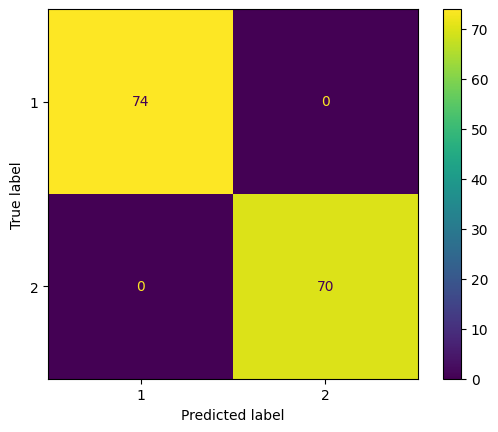

In [29]:
# Show image of confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=EM_cMatrix, display_labels=EM_binary_model.classes_)
disp.plot()
plt.show()

    Method 2: Feature importance-based feature selection

In [31]:
#Feature importances for EM pair

EM_feat_importances = EM_binary_model.get_feature_importance(prettified=True)
EM_feat_importances.head(100)

,Feature Id,Importances
0,ACGAA,5.706779
1,CAGCC,3.547273
2,TCGAA,3.463691
3,CCTGG,3.075387
4,CCCCC,2.842749
...,...,...
95,CTGCA,0.176979
96,AGGGT,0.176582
97,CCGCG,0.173902
98,GGAGC,0.173412


In [32]:
# Show only feature importances above 0.1

threshold_chosen_features = EM_feat_importances[EM_feat_importances['Importances'] >= 0.1]
num_chosen_features = len(threshold_chosen_features)

print(threshold_chosen_features)

print("\nAmount of features with importnace above 0.1 (selected features):", num_chosen_features)

    Feature Id  Importances
0        ACGAA     5.706779
1        CAGCC     3.547273
2        TCGAA     3.463691
3        CCTGG     3.075387
4        CCCCC     2.842749
..         ...          ...
164      ACTAT     0.104537
165      GATGT     0.104293
166      AAGAA     0.102985
167      AGGAA     0.101604
168      AGTCC     0.100029

[169 rows x 2 columns]

Amount of features with importnace above 0.1 (selected features): 169


In [33]:
print("Sum of total feature importances: ", sum(EM_feat_importances.Importances))
print("Sum of feature importances >=0.1: ", sum(threshold_chosen_features.Importances))

Sum of total feature importances:  100.00000000000017
Sum of feature importances >=0.1:  86.75383692679328


In [34]:
# Select features with importance values above 0.1

EM_selected_feat = EM_feat_importances[:num_chosen_features]['Feature Id'].tolist()

print(EM_selected_feat)

['ACGAA', 'CAGCC', 'TCGAA', 'CCTGG', 'CCCCC', 'CGATT', 'CGTTA', 'TCGTT', 'ACGTT', 'TATCG', 'ACGAT', 'TCGAT', 'CAGCT', 'GCCTG', 'TCAGC', 'GACGA', 'CCTGC', 'CGTTG', 'CGATA', 'CCTCC', 'TGTAA', 'ATCAA', 'CGAAA', 'CCCAG', 'GGGGA', 'CCCTG', 'CGGTA', 'CAGTG', 'CCAGC', 'AACGC', 'TCCTG', 'CAGCA', 'AAAAA', 'ATAAA', 'GGGAG', 'ATGTG', 'ATCGT', 'CTCCT', 'AACGA', 'ATTGG', 'CTCTG', 'CGATG', 'CTGAG', 'TTTCG', 'ATGTA', 'CCAGG', 'TACGG', 'ATGGT', 'CTCAG', 'ATTAC', 'AGGGG', 'CCCTC', 'TTGGT', 'CTCCC', 'TACGA', 'TGACG', 'CAATT', 'ACCCC', 'TTTTT', 'GGTAA', 'GACGG', 'GGGGC', 'AGCAG', 'GTGTG', 'TGTGC', 'CACAG', 'CCGTT', 'CGCTA', 'CGAAT', 'GGGAA', 'TCGGA', 'GCAGC', 'ATTGA', 'GGCCC', 'AGACG', 'GGATC', 'ATCCG', 'AGTGA', 'ACGCT', 'CCGAT', 'TCGGT', 'CATTG', 'TTCGA', 'TTCGT', 'CTGCC', 'CTGGA', 'CTGGG', 'AGCCT', 'CGTAA', 'TCCCC', 'GCTTG', 'CCCGC', 'ACTAG', 'ATATT', 'CAGGG', 'CTGCA', 'AGGGT', 'CCGCG', 'GGAGC', 'ACCAG', 'TATTG', 'GGCTG', 'AAATG', 'GGAGA', 'CGAAG', 'ATGCG', 'TGCAG', 'TGTAT', 'ATTCA', 'ATCGA', 'GTCCC', 

In [35]:
ER_MT_X_train.shape

(576, 1024)

In [36]:
# See original training set

ER_MT_X_train.head(299)


,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,AAAGA,AAAGC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,0.004570,0.000962,0.001203,0.003608,0.001924,0.001203,0.000240,0.001924,0.003127,0.002165,...,0.000962,0.000722,0.000722,0.001203,0.001684,0.003127,0.001924,0.001203,0.002405,0.001443
1,0.007154,0.002602,0.001951,0.002927,0.002114,0.001789,0.000813,0.002114,0.002276,0.001463,...,0.000163,0.003252,0.001301,0.001789,0.000488,0.001789,0.002927,0.002439,0.002114,0.003415
2,0.002685,0.001007,0.002685,0.001510,0.001175,0.001678,0.000336,0.000671,0.002517,0.001007,...,0.000336,0.001175,0.000839,0.001678,0.001678,0.000503,0.000839,0.000671,0.001678,0.002182
3,0.010459,0.001609,0.000805,0.000000,0.000805,0.002414,0.001609,0.000000,0.000805,0.000000,...,0.000000,0.005632,0.000000,0.000805,0.000805,0.000805,0.000000,0.002414,0.000805,0.001609
4,0.000902,0.000451,0.002254,0.000902,0.000451,0.000000,0.000000,0.000451,0.002254,0.001353,...,0.000000,0.002254,0.001353,0.000902,0.002705,0.000902,0.002705,0.002254,0.002254,0.003607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.002263,0.001006,0.001090,0.001341,0.001760,0.000922,0.000168,0.001593,0.000922,0.000419,...,0.000168,0.001174,0.002012,0.001090,0.000922,0.001760,0.001006,0.001425,0.001257,0.001760
295,0.003929,0.001135,0.001572,0.000960,0.001135,0.000786,0.000175,0.000699,0.000873,0.001310,...,0.000175,0.001572,0.001746,0.000960,0.001222,0.001222,0.000611,0.000873,0.001484,0.001310
0,0.003945,0.001255,0.002690,0.002152,0.001435,0.000359,0.001076,0.001435,0.001973,0.001435,...,0.001614,0.001255,0.003407,0.001435,0.001435,0.001973,0.001435,0.001435,0.002869,0.001435
1,0.006502,0.002956,0.001970,0.003941,0.004138,0.001576,0.001379,0.001379,0.002562,0.001970,...,0.000591,0.001970,0.001576,0.000394,0.001773,0.001773,0.004729,0.003350,0.002365,0.014778


In [37]:
#Create training set with selected features 

EM_X_train_selected = ER_MT_X_train[EM_selected_feat]
EM_X_train_selected.head()

,ACGAA,CAGCC,TCGAA,CCTGG,CCCCC,CGATT,CGTTA,TCGTT,ACGTT,TATCG,...,CATAG,TGCGT,AAAAT,GGAGG,AGGAG,ACTAT,GATGT,AAGAA,AGGAA,AGTCC
0,0.000000,0.001924,0.000240,0.002646,0.003127,0.000240,0.000240,0.000240,0.00024,0.000000,...,0.000481,0.000000,0.003608,0.001443,0.001684,0.000722,0.000240,0.003608,0.002405,0.000722
1,0.000163,0.002276,0.000163,0.001138,0.001789,0.000163,0.000000,0.000000,0.00000,0.000163,...,0.000813,0.000000,0.002927,0.001301,0.002764,0.001138,0.001301,0.004228,0.002276,0.000650
2,0.000000,0.002685,0.000000,0.003524,0.001007,0.000168,0.000336,0.000336,0.00000,0.000336,...,0.000168,0.000336,0.001510,0.004195,0.002517,0.000503,0.001510,0.002349,0.002182,0.000336
3,0.000000,0.006436,0.000000,0.000805,0.001609,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000805,0.001609,0.000000,0.000805,0.001609,0.000000,0.000000
4,0.000902,0.001353,0.000451,0.003607,0.001803,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000451,0.000451,0.000902,0.000451,0.002705,0.000902,0.000902,0.001803,0.000902,0.000451


In [38]:
# Check whether columns in new training set are the same featues are the ones selected
if(list(EM_X_train_selected.columns) == EM_selected_feat):
    print("Selected and column features are the same; properly selected");
else:
    print("Features not selected properly")

Selected and column features are the same; properly selected


In [39]:
# Check whether number of variables/sequences of training set is the same as number of labels (no change should have been made to the sequences (rows), only to the features (columns)) 
print("Shape of X_train_selected (number of variables/sequences):", EM_X_train_selected.shape)
print("Shape of y_train (number of labels):", ER_MT_y_train.shape)

Shape of X_train_selected (number of variables/sequences): (576, 169)
Shape of y_train (number of labels): (576,)


In [40]:
# Create pool object for selected feature data
print("Original number of features:", len(EM_feature_names), "\n Number of selected features:", len(EM_selected_feat))

EM_selected_train_pool = Pool(EM_X_train_selected, ER_MT_y_train, feature_names=EM_selected_feat)

Original number of features: 1024 
 Number of selected features: 169


In [41]:
#Create new model for data with selected features
EM_FIFS_model = CatBoostClassifier(loss_function="MultiClass")

# Fit new data into same model as before

EM_FIFS_model.fit(EM_selected_train_pool)

Learning rate set to 0.076932
0:	learn: 0.6478218	total: 39.5ms	remaining: 39.5s
1:	learn: 0.6054725	total: 66.7ms	remaining: 33.3s
2:	learn: 0.5677403	total: 95.4ms	remaining: 31.7s
3:	learn: 0.5348651	total: 118ms	remaining: 29.3s
4:	learn: 0.5077123	total: 139ms	remaining: 27.6s
5:	learn: 0.4790486	total: 160ms	remaining: 26.5s
6:	learn: 0.4515479	total: 180ms	remaining: 25.5s
7:	learn: 0.4277848	total: 203ms	remaining: 25.2s
8:	learn: 0.4076340	total: 228ms	remaining: 25.1s
9:	learn: 0.3878775	total: 251ms	remaining: 24.8s
10:	learn: 0.3666286	total: 284ms	remaining: 25.5s
11:	learn: 0.3493179	total: 307ms	remaining: 25.3s
12:	learn: 0.3336485	total: 335ms	remaining: 25.4s
13:	learn: 0.3176434	total: 360ms	remaining: 25.4s
14:	learn: 0.3031303	total: 382ms	remaining: 25.1s
15:	learn: 0.2901023	total: 404ms	remaining: 24.8s
16:	learn: 0.2782295	total: 427ms	remaining: 24.7s
17:	learn: 0.2665959	total: 452ms	remaining: 24.7s
18:	learn: 0.2542291	total: 473ms	remaining: 24.4s
19:	lear

In [42]:
#Check parameters used in this model fit

EM_FIFS_params = EM_FIFS_model.get_all_params()
print("Basic model parameters:", EM_FIFS_params)

Basic model parameters: {'nan_mode': 'Min', 'eval_metric': 'MultiClass', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'use_best_model': False, 'class_names': [1, 2], 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'bagging_temperature': 1, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'MultiClass', 'learning_rate': 0.07693199813365936,

In [43]:
#Prediction using X_test only for selected features data
EM_FIFS_y_pred = EM_FIFS_model.predict(ER_MT_X_test)

#Predication probability for selected features data

EM_FIFS_y_prob = EM_FIFS_model.predict_proba(ER_MT_X_test)

In [45]:
# Calculate F1 score and get classification report

print("Model 2: Feature selection (PredictionValuesChange) - Endoplasmic reticulum & mitochondria")

print("Number of chosen features:", num_chosen_features, "\n")

EM_FIFS_cr = classification_report(ER_MT_y_test, EM_FIFS_y_pred, digits=4)
print(EM_FIFS_cr)

print('Accuracy score: ', accuracy_score(ER_MT_y_test, EM_FIFS_y_pred))

EM_FIFS_f1 = f1_score(ER_MT_y_test, EM_FIFS_y_pred, average='macro')
print(f"\nF1 Score: {EM_FIFS_f1}")
# print('Roc auc score : ', roc_auc_score(ER_MT_y_test, EM_FIFS_y_prob))

Model 2: Feature selection (PredictionValuesChange) - Endoplasmic reticulum & mitochondria
Number of chosen features: 169 

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        74
           2     1.0000    1.0000    1.0000        70

    accuracy                         1.0000       144
   macro avg     1.0000    1.0000    1.0000       144
weighted avg     1.0000    1.0000    1.0000       144

Accuracy score:  1.0

F1 Score: 1.0


In [46]:
# Confusion matrix for selected data

print("real values shape:", ER_MT_y_test.shape)
print("prediction shape:", EM_FIFS_y_pred.shape)

EM_FIFS_y_pred_fl = EM_FIFS_y_pred
print("flattened prediction values shape:", EM_FIFS_y_pred_fl.ravel().shape, "\n")

EM_FIFS_cMatrix = confusion_matrix(ER_MT_y_test, EM_FIFS_y_pred_fl)
print(EM_FIFS_cMatrix)

real values shape: (144,)
prediction shape: (144, 1)
flattened prediction values shape: (144,) 

[[74  0]
 [ 0 70]]


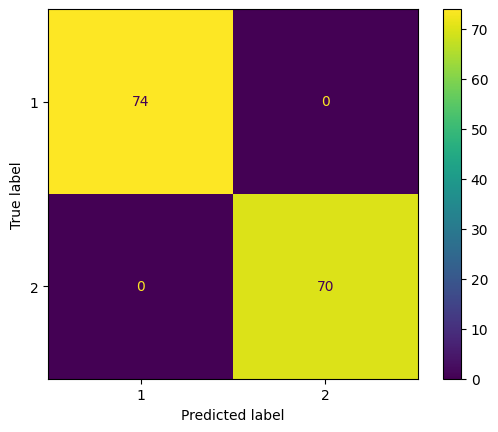

In [47]:
# Show image of confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=EM_FIFS_cMatrix, display_labels=EM_FIFS_model.classes_)
disp.plot()
plt.show()

    Method 3: Modelling using feature selection based on feature importance values (with get_feature_importances type = "ShapValues")

In [48]:
#SHAP explainer to explain CatBoost output
explainer = shap.TreeExplainer(EM_binary_model)

In [49]:
#SHAP values for X_train
EM_shap_values = explainer.shap_values(ER_MT_X_train)

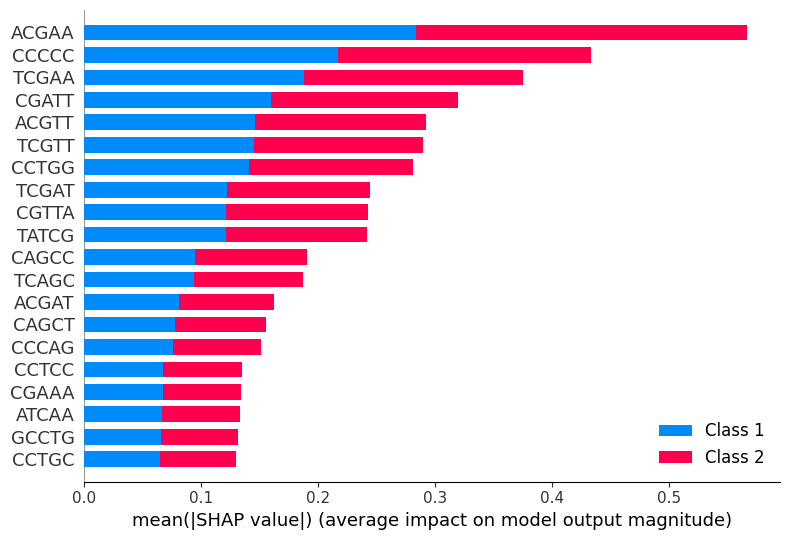

In [51]:
shap.summary_plot(EM_shap_values, ER_MT_X_train, plot_size=0.2, class_names=["Class 1", "Class 2"])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


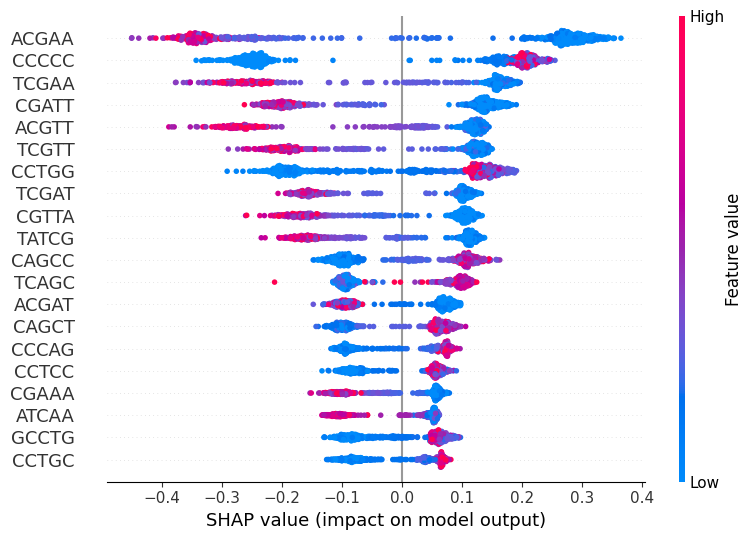

In [52]:
shap.summary_plot(EM_shap_values[0], ER_MT_X_train, plot_size=0.2)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


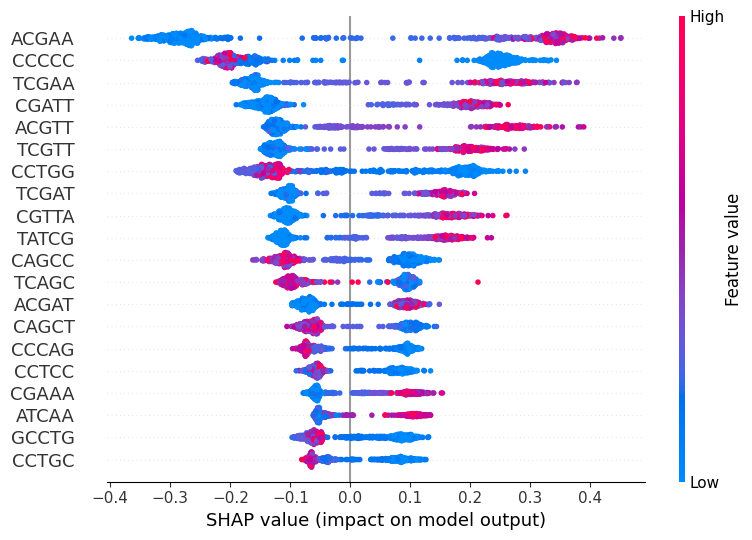

In [53]:
shap.summary_plot(EM_shap_values[1], ER_MT_X_train, plot_size=0.2)

In [54]:
shap_df = pd.DataFrame(EM_shap_values[0], columns=ER_MT_X_train.columns)


In [55]:
EM_shap_FI = (shap_df[shap_df>0]
                                .mean()
                                .sort_values(ascending=False)
                                .reset_index()
                                .rename(columns={'index':'Feature Id', 0:'Importances'})
                                # .head()
                        )

In [56]:
EM_shap_FI.head(100)

#### Check these feautre values with the features on shap plot for CP above #####
# Might need to use other method to get only features in with positive outcome + in red (those in red on right side):


,Feature Id,Importances
0,ACGAA,0.267961
1,CCCCC,0.189395
2,TCGAA,0.149901
3,CGATT,0.141705
4,CCTGG,0.122555
...,...,...
95,GTTTA,0.012878
96,CATTG,0.012554
97,TATGT,0.012516
98,ATGCG,0.012462


In [57]:
# shap.summary_plot(EM_shap_values[0], ER_MT_X_train, show=False, max_display=30, plot_size=0.2)

In [58]:
# #Try####

# vals= np.abs(EM_shap_values).mean(0)

# newtry_feature_importance = pd.DataFrame(list(zip(ER_MT_X_train.columns, sum(vals))), columns=['col_name','feature_importanEM_vals'])
# newtry_feature_importance.sort_values(by=['feature_importanEM_vals'], ascending=False,inplace=True)
# newtry_feature_importance

In [59]:
# newtry_feature_importance.head(10)

In [60]:
#Classifier results with EM_feature_importance

In [63]:
# Show only feature importances above 0.02 (0.06/3 = 0.02)

EM_SHAP_thres_chosen = EM_shap_FI[EM_shap_FI['Importances'] >= 0.02]
EM_shap_num_chosen = len(EM_SHAP_thres_chosen)

print(EM_SHAP_thres_chosen)

print("\nAmount of features with importnace above 0.02 (selected features):", EM_shap_num_chosen)

   Feature Id  Importances
0       ACGAA     0.267961
1       CCCCC     0.189395
2       TCGAA     0.149901
3       CGATT     0.141705
4       CCTGG     0.122555
..        ...          ...
61      CACAG     0.021233
62      ATCTG     0.021090
63      AGTGA     0.020752
64      CTGCA     0.020675
65      CGAAT     0.020114

[66 rows x 2 columns]

Amount of features with importnace above 0.02 (selected features): 66


In [64]:
print("Sum of total feature importances: ", sum(EM_shap_FI.Importances))
print("Sum of feature importances >=0.1: ", sum(EM_SHAP_thres_chosen.Importances))

Sum of total feature importances:  nan
Sum of feature importances >=0.1:  3.6924442809837283


In [66]:
# Select features with importance values above 0.1

EM_shap_selected_feat = EM_shap_FI[:EM_shap_num_chosen]['Feature Id'].tolist()

print(EM_shap_selected_feat)

['ACGAA', 'CCCCC', 'TCGAA', 'CGATT', 'CCTGG', 'TCGTT', 'TATCG', 'ACGTT', 'TCGAT', 'CGTTA', 'CAGCC', 'TCAGC', 'TGTAA', 'ACGAT', 'ATAAA', 'CCCAG', 'CAGCT', 'GCCTG', 'AAAAA', 'CCTCC', 'CGAAA', 'CCTGC', 'CGTTG', 'GACGA', 'ATCAA', 'GGTAA', 'CAGTG', 'CTGAG', 'AACGC', 'AACGA', 'CCCTG', 'CGATA', 'ATGTA', 'CCAGC', 'CCAGG', 'GGGAG', 'CAGCA', 'TCCTG', 'CGGTA', 'TGTGC', 'CTCAG', 'CTCCT', 'GGGGA', 'CTCCC', 'ATCGT', 'GTGTG', 'CAATT', 'CGATG', 'ATGGT', 'TACGA', 'ACCCC', 'AAATG', 'TACGG', 'CTCTG', 'GGCCC', 'ATTGG', 'TTTCG', 'AGGGG', 'AGACG', 'AGCAG', 'CCCTC', 'CACAG', 'ATCTG', 'AGTGA', 'CTGCA', 'CGAAT']


In [67]:
ER_MT_X_train.shape

(576, 1024)

In [68]:
# See original training set

ER_MT_X_train.head(826)


,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,AAAGA,AAAGC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,0.004570,0.000962,0.001203,0.003608,0.001924,0.001203,0.000240,0.001924,0.003127,0.002165,...,0.000962,0.000722,0.000722,0.001203,0.001684,0.003127,0.001924,0.001203,0.002405,0.001443
1,0.007154,0.002602,0.001951,0.002927,0.002114,0.001789,0.000813,0.002114,0.002276,0.001463,...,0.000163,0.003252,0.001301,0.001789,0.000488,0.001789,0.002927,0.002439,0.002114,0.003415
2,0.002685,0.001007,0.002685,0.001510,0.001175,0.001678,0.000336,0.000671,0.002517,0.001007,...,0.000336,0.001175,0.000839,0.001678,0.001678,0.000503,0.000839,0.000671,0.001678,0.002182
3,0.010459,0.001609,0.000805,0.000000,0.000805,0.002414,0.001609,0.000000,0.000805,0.000000,...,0.000000,0.005632,0.000000,0.000805,0.000805,0.000805,0.000000,0.002414,0.000805,0.001609
4,0.000902,0.000451,0.002254,0.000902,0.000451,0.000000,0.000000,0.000451,0.002254,0.001353,...,0.000000,0.002254,0.001353,0.000902,0.002705,0.000902,0.002705,0.002254,0.002254,0.003607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.002593,0.000864,0.001729,0.003457,0.000864,0.000864,0.000000,0.000000,0.000864,0.000000,...,0.000000,0.001729,0.000864,0.000864,0.000864,0.000000,0.002593,0.000864,0.000000,0.000864
276,0.006066,0.002600,0.005199,0.005199,0.001733,0.000867,0.000000,0.005199,0.002600,0.002600,...,0.000867,0.002600,0.003466,0.001733,0.001733,0.000867,0.004333,0.002600,0.000867,0.000000
277,0.005213,0.002606,0.001738,0.001738,0.001738,0.000000,0.000000,0.001738,0.003475,0.000869,...,0.001738,0.003475,0.004344,0.003475,0.006082,0.002606,0.001738,0.002606,0.005213,0.003475
278,0.004355,0.000871,0.003484,0.005226,0.003484,0.000000,0.000000,0.000871,0.006098,0.003484,...,0.001742,0.004355,0.003484,0.002613,0.000000,0.002613,0.002613,0.006098,0.003484,0.007840


In [69]:
#Create training set with selected features 

EM_X_train_shap_selected = ER_MT_X_train[EM_shap_selected_feat]
EM_X_train_shap_selected.head()

,ACGAA,CCCCC,TCGAA,CGATT,CCTGG,TCGTT,TATCG,ACGTT,TCGAT,CGTTA,...,TTTCG,AGGGG,AGACG,AGCAG,CCCTC,CACAG,ATCTG,AGTGA,CTGCA,CGAAT
0,0.000000,0.003127,0.000240,0.000240,0.002646,0.000240,0.000000,0.00024,0.000240,0.000240,...,0.000962,0.001443,0.000000,0.001924,0.001443,0.001924,0.002405,0.000000,0.002165,0.000000
1,0.000163,0.001789,0.000163,0.000163,0.001138,0.000000,0.000163,0.00000,0.000000,0.000000,...,0.000163,0.000488,0.000163,0.001789,0.001138,0.001951,0.000650,0.001626,0.001951,0.000000
2,0.000000,0.001007,0.000000,0.000168,0.003524,0.000336,0.000336,0.00000,0.000168,0.000336,...,0.000336,0.001678,0.000000,0.001510,0.003188,0.001678,0.000336,0.002517,0.002853,0.000168
3,0.000000,0.001609,0.000000,0.000000,0.000805,0.000000,0.000000,0.00000,0.000805,0.000000,...,0.000000,0.001609,0.000805,0.004023,0.000805,0.003218,0.001609,0.000805,0.002414,0.000000
4,0.000902,0.001803,0.000451,0.000000,0.003607,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000902,0.000451,0.003156,0.000902,0.001353,0.002254,0.001353,0.004959,0.000451


In [70]:
# Check whether columns in new training set are the same featues are the ones selected
if(list(EM_X_train_shap_selected.columns) == EM_shap_selected_feat):
    print("Selected and column features are the same; properly selected");
else:
    print("Features not selected properly")

Selected and column features are the same; properly selected


In [71]:
# Check whether number of variables/sequences of training set is the same as number of labels (no change should have been made to the sequences (rows), only to the features (columns)) 
print("Shape of X_train_selected (number of variables/sequences):", EM_X_train_shap_selected.shape)
print("Shape of y_train (number of labels):", ER_MT_y_train.shape)

Shape of X_train_selected (number of variables/sequences): (576, 66)
Shape of y_train (number of labels): (576,)


In [72]:
# Create pool object for selected feature data
print("Original number of features:", len(EM_feature_names), "\n Number of selected features:", len(EM_shap_selected_feat))

EM_shap_selected_train_pool = Pool(EM_X_train_shap_selected, ER_MT_y_train, feature_names=EM_shap_selected_feat)

Original number of features: 1024 
 Number of selected features: 66


In [73]:
#Create new model for data with selected features
EM_FIFS_shap_model = CatBoostClassifier(loss_function="MultiClass")

# Fit new data into same model as before

EM_FIFS_shap_model.fit(EM_shap_selected_train_pool)

Learning rate set to 0.076932
0:	learn: 0.6472859	total: 16.3ms	remaining: 16.3s
1:	learn: 0.6055352	total: 26ms	remaining: 13s
2:	learn: 0.5675423	total: 35.1ms	remaining: 11.7s
3:	learn: 0.5340034	total: 46.5ms	remaining: 11.6s
4:	learn: 0.4995203	total: 56.2ms	remaining: 11.2s
5:	learn: 0.4713549	total: 68.4ms	remaining: 11.3s
6:	learn: 0.4418375	total: 79.1ms	remaining: 11.2s
7:	learn: 0.4174540	total: 89.6ms	remaining: 11.1s
8:	learn: 0.3955658	total: 101ms	remaining: 11.1s
9:	learn: 0.3749055	total: 113ms	remaining: 11.2s
10:	learn: 0.3569325	total: 123ms	remaining: 11.1s
11:	learn: 0.3394017	total: 132ms	remaining: 10.9s
12:	learn: 0.3231125	total: 141ms	remaining: 10.7s
13:	learn: 0.3071341	total: 150ms	remaining: 10.6s
14:	learn: 0.2936971	total: 159ms	remaining: 10.4s
15:	learn: 0.2801656	total: 168ms	remaining: 10.3s
16:	learn: 0.2683852	total: 177ms	remaining: 10.2s
17:	learn: 0.2563165	total: 185ms	remaining: 10.1s
18:	learn: 0.2453408	total: 194ms	remaining: 10s
19:	learn

In [74]:
#Check parameters used in this model fit

EM_FIFS_shap_params = EM_FIFS_shap_model.get_all_params()
print("Basic model parameters:", EM_FIFS_shap_params)

Basic model parameters: {'nan_mode': 'Min', 'eval_metric': 'MultiClass', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'use_best_model': False, 'class_names': [1, 2], 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'bagging_temperature': 1, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'MultiClass', 'learning_rate': 0.07693199813365936,

In [75]:
#Prediction using X_test only for selected features data
EM_FIFS_shap_y_pred = EM_FIFS_shap_model.predict(ER_MT_X_test)

#Predication probability for selected features data

EM_FIFS_shap_y_prob = EM_FIFS_shap_model.predict_proba(ER_MT_X_test)

In [80]:
# Calculate F1 score and get classification report

print("Model 3: Feature selection (SHAP) - Endoplasmic reticulum & mitochondria")

print("Number of chosen features:", len(EM_shap_selected_feat), "\n")

EM_FIFS_shap_cr = classification_report(ER_MT_y_test, EM_FIFS_shap_y_pred, digits=4)
print(EM_FIFS_shap_cr)

print('Accuracy score: ', accuracy_score(ER_MT_y_test, EM_FIFS_shap_y_pred))

EM_FIFS_shap_f1 = f1_score(ER_MT_y_test, EM_FIFS_shap_y_pred, average='macro')
print(f"F1 Score: {EM_FIFS_shap_f1}")

# print('Roc auc score : ', roc_auc_score(ER_MT_y_test, EM_FIFS_shap_y_prob))

Model 3: Feature selection (SHAP) - Endoplasmic reticulum & mitochondria
Number of chosen features: 66 

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        74
           2     1.0000    1.0000    1.0000        70

    accuracy                         1.0000       144
   macro avg     1.0000    1.0000    1.0000       144
weighted avg     1.0000    1.0000    1.0000       144

Accuracy score:  1.0
F1 Score: 1.0


In [78]:
# Confusion matrix for selected data

print("real values shape:", ER_MT_y_test.shape)
print("prediction shape:", EM_FIFS_shap_y_pred.shape)

EM_FIFS_shap_y_pred_fl = EM_FIFS_shap_y_pred
print("flattened prediction values shape:", EM_FIFS_shap_y_pred_fl.ravel().shape, "\n")

EM_FIFS_shap_cMatrix = confusion_matrix(ER_MT_y_test, EM_FIFS_shap_y_pred_fl)
print(EM_FIFS_shap_cMatrix)

real values shape: (144,)
prediction shape: (144, 1)
flattened prediction values shape: (144,) 

[[74  0]
 [ 0 70]]


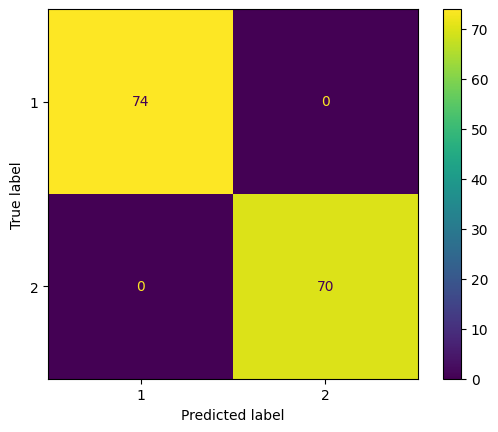

In [79]:
# Show image of confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=EM_FIFS_shap_cMatrix, display_labels=EM_FIFS_shap_model.classes_)
disp.plot()
plt.show()

In [60]:
#Classifier results with newtry_feature_importance

In [61]:
# newtry_feature_importance.head(100)

,col_name,feature_importanEM_vals
96,ACGAA,163.218798
341,CCCCC,124.796957
864,TCGAA,108.120087
399,CGATT,92.097727
111,ACGTT,84.285502
...,...,...
182,AGTCG,7.557760
1023,TTTTT,7.526182
198,ATACG,7.435719
107,ACGGT,7.249166


In [62]:
# # Show only feature importances above 0.1

# EM_newSHAP_thres_chosen = newtry_feature_importance[:100]
# EM_newshap_num_chosen = len(EM_newSHAP_thres_chosen)

# print(EM_newSHAP_thres_chosen)

# print("\nAmount of features with importnace above 0.1 (selected features):", EM_newshap_num_chosen)

     col_name  feature_importanEM_vals
96      ACGAA               163.218798
341     CCCCC               124.796957
864     TCGAA               108.120087
399     CGATT                92.097727
111     ACGTT                84.285502
...       ...                      ...
182     AGTCG                 7.557760
1023    TTTTT                 7.526182
198     ATACG                 7.435719
107     ACGGT                 7.249166
764     GTTTA                 7.229393

[100 rows x 2 columns]

Amount of features with importnace above 0.1 (selected features): 100


In [63]:
# print("Sum of total feature importances: ", sum(newtry_feature_importance.feature_importanEM_vals))
# print("Sum of feature importances >=0.1: ", sum(EM_newSHAP_thres_chosen.feature_importanEM_vals))

Sum of total feature importances:  3634.9912638015876
Sum of feature importances >=0.1:  2640.9205708909826


In [64]:
# # Select features with importance values above 0.1

# EM_newshap_selected_feat = newtry_feature_importance[:EM_newshap_num_chosen]['col_name'].tolist()

# print(EM_newshap_selected_feat)

['ACGAA', 'CCCCC', 'TCGAA', 'CGATT', 'ACGTT', 'TCGTT', 'CCTGG', 'TCGAT', 'CGTTA', 'TATCG', 'CAGCC', 'TCAGC', 'ACGAT', 'CAGCT', 'CCCAG', 'CCTCC', 'CGAAA', 'ATCAA', 'GCCTG', 'CCTGC', 'CGTTG', 'CAGTG', 'CGATA', 'TGTAA', 'AACGC', 'GACGA', 'AAAAA', 'CAGCA', 'CGGTA', 'CCCTG', 'CCAGC', 'GGGAG', 'CTGAG', 'ATAAA', 'TCCTG', 'CCAGG', 'AACGA', 'CTCCT', 'GGTAA', 'CTCAG', 'CAATT', 'TACGG', 'ATTGG', 'ATCGT', 'AGGGG', 'TTTCG', 'ACCCC', 'TGTGC', 'CTCTG', 'ATGGT', 'GGGGA', 'CGATG', 'CTCCC', 'CACAG', 'GGCCC', 'TTGGT', 'CGAAT', 'TACGA', 'AGACG', 'AGCAG', 'CCCTC', 'TCCCC', 'GGGGC', 'ATGTA', 'GTGTG', 'CAGGG', 'ATGTG', 'ACTAG', 'GGCTG', 'ATTAC', 'TTACG', 'GTCGT', 'CATTG', 'GGAGC', 'GCAGC', 'AGTGA', 'CTGGG', 'ATGCG', 'TTCGA', 'ATCTG', 'CTGGA', 'GGGAA', 'ACCAG', 'CCCGC', 'TTCGT', 'CGTAA', 'TGCAG', 'CCCCT', 'CTGCA', 'ATTCA', 'GGAGG', 'GCCCT', 'CCGAT', 'CCAAT', 'GTCCC', 'AGTCG', 'TTTTT', 'ATACG', 'ACGGT', 'GTTTA']


In [65]:
# ER_MT_X_train.shape

(576, 1024)

In [66]:
# # See original training set

# ER_MT_X_train.head(826)


,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,AAAGA,AAAGC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,0.004570,0.000962,0.001203,0.003608,0.001924,0.001203,0.000240,0.001924,0.003127,0.002165,...,0.000962,0.000722,0.000722,0.001203,0.001684,0.003127,0.001924,0.001203,0.002405,0.001443
1,0.007154,0.002602,0.001951,0.002927,0.002114,0.001789,0.000813,0.002114,0.002276,0.001463,...,0.000163,0.003252,0.001301,0.001789,0.000488,0.001789,0.002927,0.002439,0.002114,0.003415
2,0.002685,0.001007,0.002685,0.001510,0.001175,0.001678,0.000336,0.000671,0.002517,0.001007,...,0.000336,0.001175,0.000839,0.001678,0.001678,0.000503,0.000839,0.000671,0.001678,0.002182
3,0.010459,0.001609,0.000805,0.000000,0.000805,0.002414,0.001609,0.000000,0.000805,0.000000,...,0.000000,0.005632,0.000000,0.000805,0.000805,0.000805,0.000000,0.002414,0.000805,0.001609
4,0.000902,0.000451,0.002254,0.000902,0.000451,0.000000,0.000000,0.000451,0.002254,0.001353,...,0.000000,0.002254,0.001353,0.000902,0.002705,0.000902,0.002705,0.002254,0.002254,0.003607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.002593,0.000864,0.001729,0.003457,0.000864,0.000864,0.000000,0.000000,0.000864,0.000000,...,0.000000,0.001729,0.000864,0.000864,0.000864,0.000000,0.002593,0.000864,0.000000,0.000864
276,0.006066,0.002600,0.005199,0.005199,0.001733,0.000867,0.000000,0.005199,0.002600,0.002600,...,0.000867,0.002600,0.003466,0.001733,0.001733,0.000867,0.004333,0.002600,0.000867,0.000000
277,0.005213,0.002606,0.001738,0.001738,0.001738,0.000000,0.000000,0.001738,0.003475,0.000869,...,0.001738,0.003475,0.004344,0.003475,0.006082,0.002606,0.001738,0.002606,0.005213,0.003475
278,0.004355,0.000871,0.003484,0.005226,0.003484,0.000000,0.000000,0.000871,0.006098,0.003484,...,0.001742,0.004355,0.003484,0.002613,0.000000,0.002613,0.002613,0.006098,0.003484,0.007840


In [67]:
# #Create training set with selected features 

# EM_X_train_newshap_selected = ER_MT_X_train[EM_newshap_selected_feat]
# EM_X_train_newshap_selected.head()

,ACGAA,CCCCC,TCGAA,CGATT,ACGTT,TCGTT,CCTGG,TCGAT,CGTTA,TATCG,...,GGAGG,GCCCT,CCGAT,CCAAT,GTCCC,AGTCG,TTTTT,ATACG,ACGGT,GTTTA
0,0.000000,0.003127,0.000240,0.000240,0.00024,0.000240,0.002646,0.000240,0.000240,0.000000,...,0.001443,0.001203,0.000000,0.001203,0.000962,0.000000,0.001443,0.000240,0.000000,0.000722
1,0.000163,0.001789,0.000163,0.000163,0.00000,0.000000,0.001138,0.000000,0.000000,0.000163,...,0.001301,0.000488,0.000813,0.000976,0.000325,0.000000,0.003415,0.000325,0.000325,0.000488
2,0.000000,0.001007,0.000000,0.000168,0.00000,0.000336,0.003524,0.000168,0.000336,0.000336,...,0.004195,0.002182,0.000168,0.000336,0.001510,0.000671,0.002182,0.000168,0.000168,0.000336
3,0.000000,0.001609,0.000000,0.000000,0.00000,0.000000,0.000805,0.000805,0.000000,0.000000,...,0.000805,0.000805,0.000805,0.001609,0.000000,0.000000,0.001609,0.000000,0.000000,0.000805
4,0.000902,0.001803,0.000451,0.000000,0.00000,0.000000,0.003607,0.000000,0.000000,0.000000,...,0.000451,0.001353,0.000000,0.000902,0.000902,0.000451,0.003607,0.000451,0.000902,0.000451


In [68]:
# # Check whether columns in new training set are the same featues are the ones selected
# if(list(EM_X_train_newshap_selected.columns) == EM_newshap_selected_feat):
#     print("Selected and column features are the same; properly selected");
# else:
#     print("Features not selected properly")

Selected and column features are the same; properly selected


In [69]:
# # Check whether number of variables/sequences of training set is the same as number of labels (no change should have been made to the sequences (rows), only to the features (columns)) 
# print("Shape of X_train_selected (number of variables/sequences):", EM_X_train_newshap_selected.shape)
# print("Shape of y_train (number of labels):", ER_MT_y_train.shape)

Shape of X_train_selected (number of variables/sequences): (576, 100)
Shape of y_train (number of labels): (576,)


In [70]:
# # Create pool object for selected feature data
# print("Original number of features:", len(EM_feature_names), "\n Number of selected features:", len(EM_newshap_selected_feat))

# EM_newshap_selected_train_pool = Pool(EM_X_train_newshap_selected, ER_MT_y_train, feature_names=EM_newshap_selected_feat)

Original number of features: 1024 
 Number of selected features: 100


In [71]:
# #Create new model for data with selected features
# EM_FIFS_newshap_model = CatBoostClassifier(loss_function="MultiClass")

# # Fit new data into same model as before

# EM_FIFS_newshap_model.fit(EM_newshap_selected_train_pool)

Learning rate set to 0.076932
0:	learn: 0.6451446	total: 22.3ms	remaining: 22.3s
1:	learn: 0.6029992	total: 37.2ms	remaining: 18.6s
2:	learn: 0.5636243	total: 54.3ms	remaining: 18s
3:	learn: 0.5282339	total: 69.1ms	remaining: 17.2s
4:	learn: 0.4985467	total: 82.6ms	remaining: 16.4s
5:	learn: 0.4698538	total: 96.9ms	remaining: 16.1s
6:	learn: 0.4423817	total: 112ms	remaining: 15.9s
7:	learn: 0.4191345	total: 126ms	remaining: 15.7s
8:	learn: 0.3977296	total: 140ms	remaining: 15.4s
9:	learn: 0.3757734	total: 152ms	remaining: 15.1s
10:	learn: 0.3566002	total: 166ms	remaining: 14.9s
11:	learn: 0.3394880	total: 178ms	remaining: 14.7s
12:	learn: 0.3229074	total: 192ms	remaining: 14.6s
13:	learn: 0.3093423	total: 205ms	remaining: 14.4s
14:	learn: 0.2942837	total: 218ms	remaining: 14.3s
15:	learn: 0.2826522	total: 231ms	remaining: 14.2s
16:	learn: 0.2707877	total: 244ms	remaining: 14.1s
17:	learn: 0.2587607	total: 258ms	remaining: 14.1s
18:	learn: 0.2482395	total: 271ms	remaining: 14s
19:	learn

In [72]:
# #Check parameters used in this model fit

# EM_FIFS_newshap_params = EM_FIFS_newshap_model.get_all_params()
# print("Basic model parameters:", EM_FIFS_newshap_params)

Basic model parameters: {'nan_mode': 'Min', 'eval_metric': 'MultiClass', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'use_best_model': False, 'class_names': [1, 2], 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'bagging_temperature': 1, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'MultiClass', 'learning_rate': 0.07693199813365936,

In [73]:
# #Prediction using X_test only for selected features data
# EM_FIFS_newshap_y_pred = EM_FIFS_newshap_model.predict(ER_MT_X_test)

# #Predication probability for selected features data

# EM_FIFS_newshap_y_prob = EM_FIFS_newshap_model.predict_proba(ER_MT_X_test)

In [74]:
# # Calculate F1 score and get classification report

# EM_FIFS_newshap_f1 = f1_score(ER_MT_y_test, EM_FIFS_newshap_y_pred, average='macro')
# print(f"F1 Score: {EM_FIFS_newshap_f1}")

# EM_FIFS_newshap_cr = classification_report(ER_MT_y_test, EM_FIFS_newshap_y_pred, digits=4)
# print(EM_FIFS_newshap_cr)

# print('Accuracy score: ', accuracy_score(ER_MT_y_test, EM_FIFS_newshap_y_pred))
# # print('Roc auc score : ', roc_auc_score(ER_MT_y_test, EM_FIFS_newshap_y_prob))

F1 Score: 1.0
              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        74
           2     1.0000    1.0000    1.0000        70

    accuracy                         1.0000       144
   macro avg     1.0000    1.0000    1.0000       144
weighted avg     1.0000    1.0000    1.0000       144

Accuracy score:  1.0


In [75]:
# # Confusion matrix for selected data

# print("real values shape:", ER_MT_y_test.shape)
# print("prediction shape:", EM_FIFS_newshap_y_pred.shape)

# EM_FIFS_newshap_y_pred_fl = EM_FIFS_newshap_y_pred
# print("flattened prediction values shape:", EM_FIFS_newshap_y_pred_fl.ravel().shape, "\n")

# EM_FIFS_newshap_cMatrix = confusion_matrix(ER_MT_y_test, EM_FIFS_newshap_y_pred_fl)
# print(EM_FIFS_newshap_cMatrix)

real values shape: (144,)
prediction shape: (144, 1)
flattened prediction values shape: (144,) 

[[74  0]
 [ 0 70]]


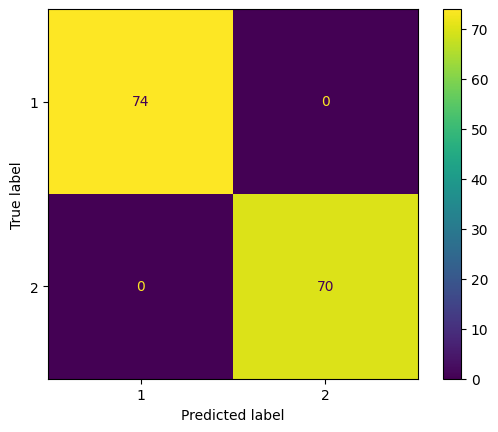

In [76]:
# # Show image of confusion matrix

# disp = ConfusionMatrixDisplay(confusion_matrix=EM_FIFS_newshap_cMatrix, display_labels=EM_FIFS_newshap_model.classes_)
# disp.plot()
# plt.show()